<a href="https://colab.research.google.com/github/ShuqairABD/Yolo-World/blob/main/YOLO_WORLD_zero_shot_object_detection_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Mar  6 11:59:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os

# Получение текущей рабочей директории
HOME = os.getcwd()

# Вывод текущей рабочей директории
print(HOME)

/content


## Установка необходимых пакетов (YOLO-WORLD)




In [3]:
!pip install -q inference-gpu[yolo-world]==0.9.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.2/319.2 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -q supervision==0.19.0rc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.8 MB/s eta 0:00:00


##  Импорты


In [5]:
import cv2
import supervision as sv

from tqdm import tqdm
from inference.models import YOLOWorld

[03/06/24 12:04:50] WARNING  Your inference package version 0.9.13 is out of date! Please upgrade to ]8;id=768106;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=565534;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             version 0.9.15 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

## Загрузка примерных данных


In [26]:
!wget -P {HOME} -q /content/diving.mp4

In [27]:
SOURCE_VIDEO_PATH = f"{HOME}/diving.mp4"

## Запуск Object Detection








In [28]:
model = YOLOWorld(model_id="yolo_world/l")

In [29]:
# Инициализация аннотатора ограничительных рамок с указанием толщины линий
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)

# Инициализация аннотатора меток с указанием толщины текста, масштаба и цвета
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)


## Обработка видео


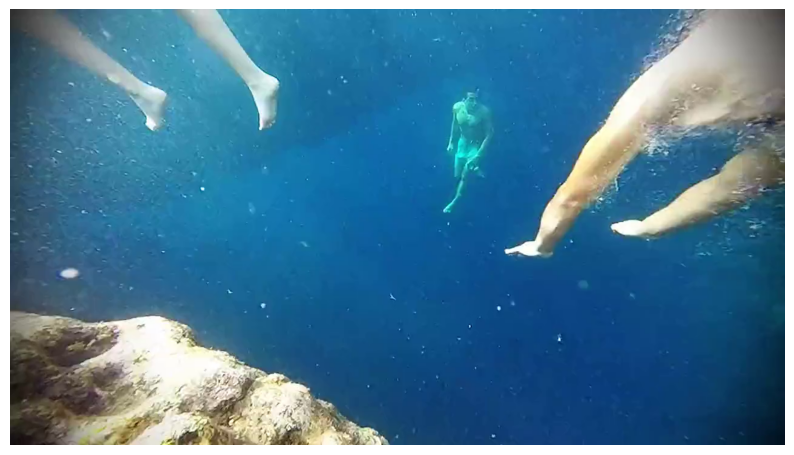

In [30]:
# Получение генератора кадров из видео
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Получение следующего кадра из генератора
frame = next(generator)

# Построение изображения с помощью библиотеки Supervisely
sv.plot_image(frame, (10, 10))


In [31]:
# Установка классов объектов для модели
classes = ["bubble", "person"]
model.set_classes(classes)

In [32]:
# Получение результатов вывода модели для кадра с заданным порогом уверенности
results = model.infer(frame, confidence=0.002)

# Создание объекта обнаружения на основе результатов вывода с применением подавления немаксимальных значений (NMS)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)

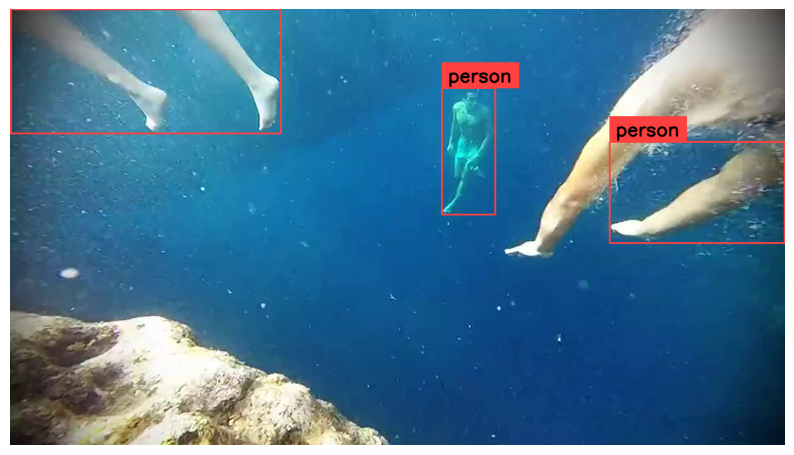

In [33]:
# Создание копии кадра для аннотации
annotated_image = frame.copy()

# Добавление ограничительных рамок к обнаруженным объектам
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)

# Добавление меток к обнаруженным объектам
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)

# Отображение аннотированного изображения
sv.plot_image(annotated_image, (10, 10))

## Фильтрация обнаружений по области

In [34]:
# Получение информации о видео из указанного пути
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_info

VideoInfo(width=1280, height=720, fps=29, total_frames=304)

In [35]:
# Получение ширины и высоты кадра видео
width, height = video_info.resolution_wh

# Вычисление площади кадра видео
frame_area = width * height

# Вывод площади кадра
frame_area


921600

**Область каждой отдельной bounding box.**

In [36]:
# Выполнение вывода модели для обнаружения объектов на кадре
results = model.infer(frame, confidence=0.002)

# Создание объекта обнаружения с помощью результатов вывода модели с применением метода NMS
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)

# Получение площади обнаруженных объектов
detections.area


array([      18401,       91626,       48388])

In [37]:
# Проверка, является ли отношение площади объектов к площади кадра менее 0.10
(detections.area / frame_area) < 0.10

array([ True,  True,  True])

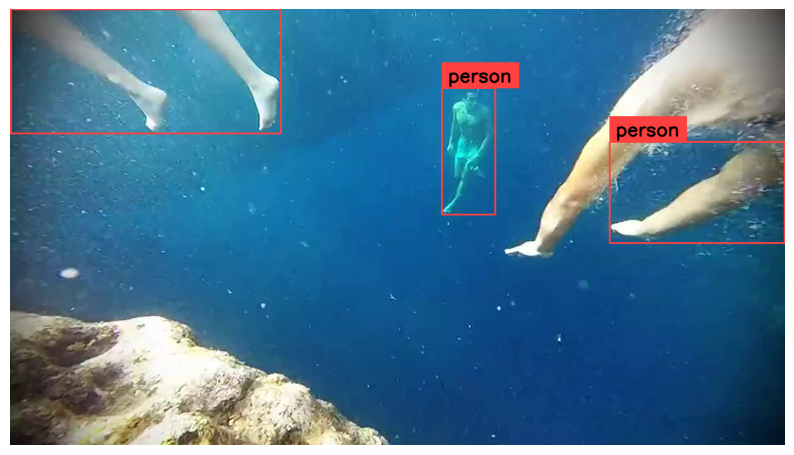

In [38]:
# Фильтрация обнаруженных объектов по площади
detections = detections[(detections.area / frame_area) < 0.10]

# Создание аннотированного изображения с помощью аннотаторов
annotated_image = frame.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)

# Вывод аннотированного изображения
sv.plot_image(annotated_image, (10, 10))


## Итоговый результат


**Скорость YOLO-World**.

In [39]:
TARGET_VIDEO_PATH = f"{HOME}/diving-output.mp4"

In [40]:
# Создание генератора кадров из исходного видео
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Получение информации о видео (разрешение, количество кадров и т. д.)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# Получение ширины и высоты кадра видео
width, height = video_info.resolution_wh

# Вычисление площади кадра видео
frame_area = width * height
frame_area

# Итерация по каждому кадру из генератора и аннотация объектов
with sv.VideoSink(target_path=TARGET_VIDEO_PATH, video_info=video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Обнаружение объектов на кадре с заданным уровнем уверенности
        results = model.infer(frame, confidence=0.002)

        # Фильтрация результатов обнаружения с помощью порога Non-Maximum Suppression (NMS)
        detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)
        detections = detections[(detections.area / frame_area) < 0.10]

        # Создание аннотированного кадра с помощью аннотаторов
        annotated_frame = frame.copy()
        annotated_frame = BOUNDING_BOX_ANNOTATOR.annotate(annotated_frame, detections)
        annotated_frame = LABEL_ANNOTATOR.annotate(annotated_frame, detections)

        # Запись аннотированного кадра в выходное видео
        sink.write_frame(annotated_frame)


100%|██████████| 304/304 [00:19<00:00, 15.52it/s]
